In [62]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
#splitting the dataset into test-train
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
#SMOTE technique to deal with class imbalance within the data
from imblearn.over_sampling import SMOTE 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

In [2]:
df = pd.read_csv('data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 21)

In [68]:
df.isna().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [66]:
df.duplicated().sum()

0

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

From the data we call see that there are columns which contain Categorical and Numeric values.

Categorical columns include: -
- State
- International plan
- Voicemail plan
- Area code

Numeric columns include: -
- account length
- number vmail messages
- total day minutes
- total day calls
- total day charge
- total eve minutes
- total eve calls
- total eve charge
- total night minutes
- total night calls
- total night charge
- total intl minutes 
- total intl calls
- total intl charge
- customer service call

In [71]:
# Create numeric & categorical lists
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']

categoric_cols= ['state', 'area code', 'international plan', 'voice mail plan']

Phone number is not a good predictor of churn because it is not a reliable indicator of customer behavior therefore it is necessary to drop it

In [7]:
df = df.drop('phone number', axis=1)

In [9]:
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

### Churn distribution


False    2850
True      483
Name: churn, dtype: int64


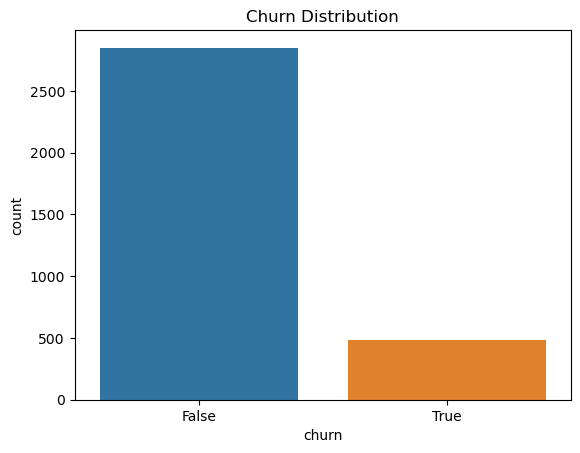

In [10]:
# Countplot of churn distribution
print(df.churn.value_counts())
sns.countplot(data=df, x='churn')
plt.title('Churn Distribution')
plt.show()

Our dataset has class imbalance, therefore during modelling we have to account for that using SMOTE.


## Checking Churn for each variable


### Area code with the highest churn


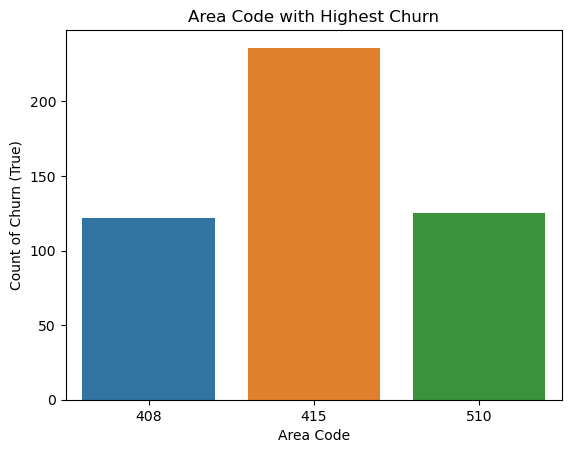

415    236
510    125
408    122
Name: area code, dtype: int64


In [12]:
# Filtering the DataFrame to include only rows with churn = True
df_churn_true = df[df['churn'] == True]

# Counting the churn values for each area code
churn_counts_area_code = df_churn_true['area code'].value_counts()

# Creating the bar plot
sns.barplot(x=churn_counts_area_code.index, y=churn_counts_area_code.values)

# Adding labels and title
plt.xlabel('Area Code')
plt.ylabel('Count of Churn (True)')
plt.title('Area Code with Highest Churn')


# Displaying the plot
plt.show()

print(churn_counts_area_code)

Area code 415 has the highest amount of churn, followed by Area code 510 and lastly area code 408 

### International plan with the highest churn


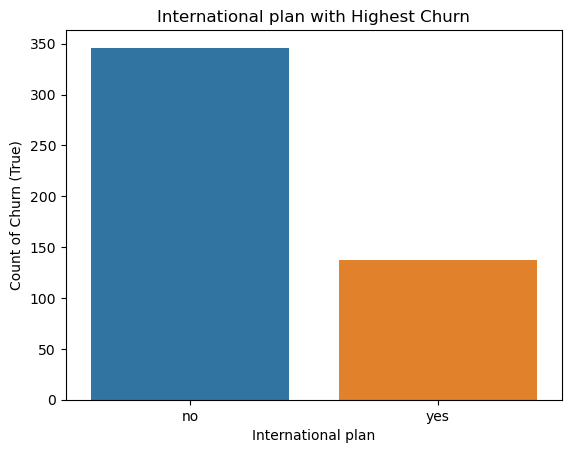

no     346
yes    137
Name: international plan, dtype: int64


In [13]:
# Filtering the DataFrame to include only rows with churn = True
df_churn_true = df[df['churn'] == True]

# Counting the churn values for each international plan
churn_counts_int_plan = df_churn_true['international plan'].value_counts()

# Creating the bar plot
sns.barplot(x=churn_counts_int_plan.index, y=churn_counts_int_plan.values)

# Adding labels and title
plt.xlabel('International plan')
plt.ylabel('Count of Churn (True)')
plt.title('International plan with Highest Churn')


# Displaying the plot
plt.show()

print(churn_counts_int_plan)

The consumers who have no international plan have the highest churn. This could be possibly due to perceived limitations, competitive offerings, inadequate communication, and dissatisfaction with international services.


### Voicemail plan with the highest churn


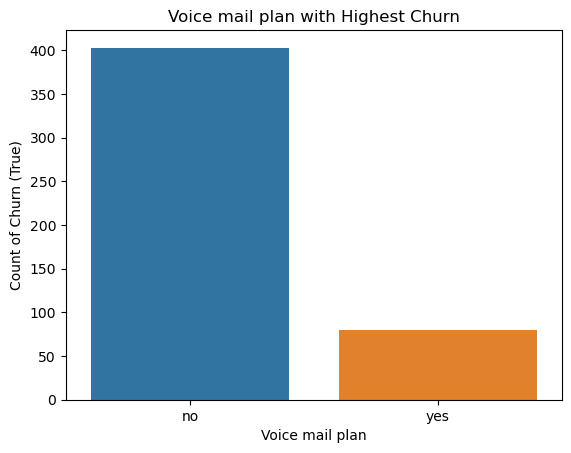

no     403
yes     80
Name: voice mail plan, dtype: int64


In [14]:
# Filtering the DataFrame to include only rows with churn = True
df_churn_true = df[df['churn'] == True]

# Counting the churn values for each international plan
churn_counts_voicemail = df_churn_true['voice mail plan'].value_counts()

# Creating the bar plot
sns.barplot(x=churn_counts_voicemail.index, y=churn_counts_voicemail.values)

# Adding labels and title
plt.xlabel('Voice mail plan')
plt.ylabel('Count of Churn (True)')
plt.title('Voice mail plan with Highest Churn')


# Displaying the plot
plt.show()

print(churn_counts_voicemail)

Customers with no voicemail plan have the highest churn


### States with the highest churn

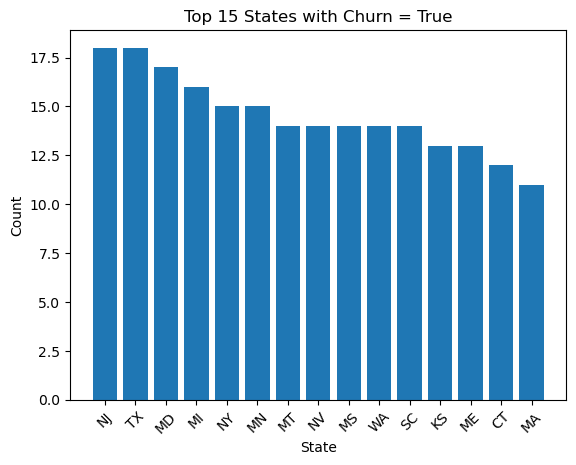

In [76]:
# Filter the dataframe to include only true churn
churn_true_df = df[df['churn'] == True]

# Group data by state and count occurrences
state_counts = churn_true_df['state'].value_counts()

# Sort states by counts in descending order
sorted_states = state_counts.sort_values(ascending=False)

# Select top 15 states
top_15_states = sorted_states.head(15)

# Step 5: Plot bar graph
plt.bar(top_15_states.index, top_15_states.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 15 States with Churn = True')
plt.xticks(rotation=45)
plt.show()

### Numeric values Analysis


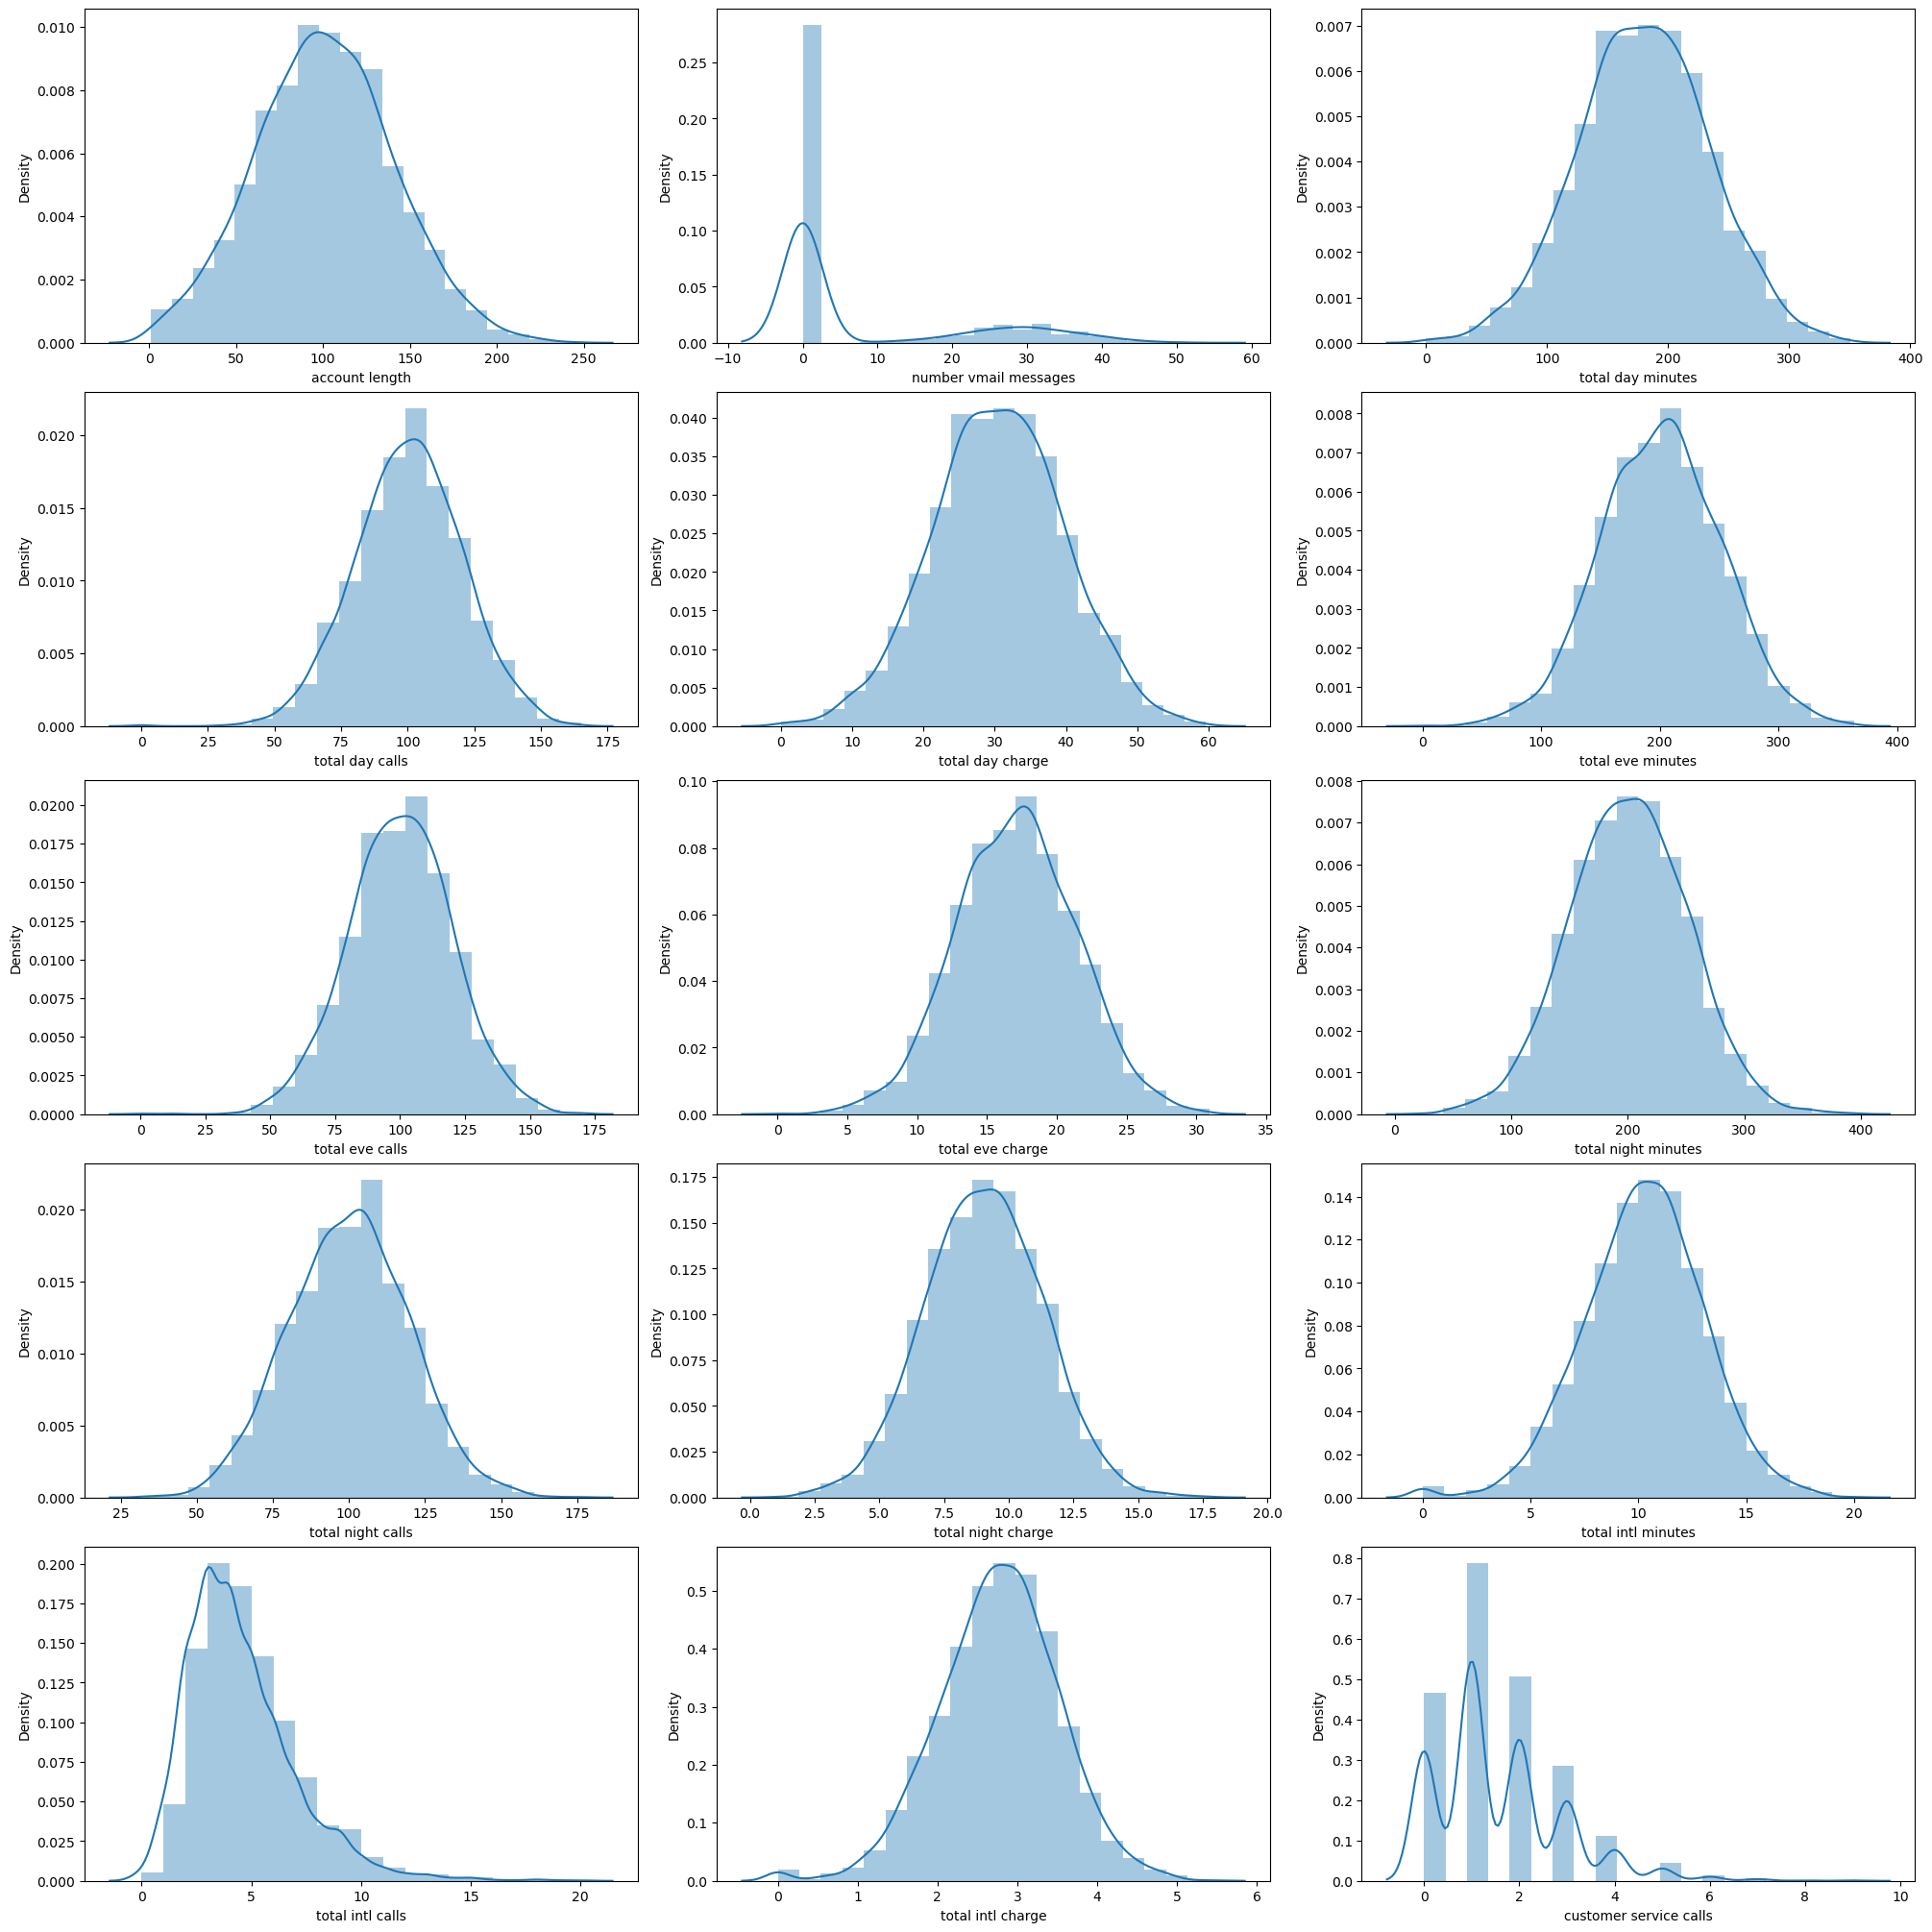

In [16]:
# Create the figure and axes
f, ax = plt.subplots(5, 3, figsize=(20,20 ), constrained_layout=True)

# Iterate through the list of numeric columns and create a distribution plot for each column
for i, column in enumerate(numeric_cols):
    sns.distplot(df[column], bins=20, ax=ax[i // 3][i % 3])

# Show the figure
plt.show()

* For the distribution plots of the numeric features above, all of them except customer service calls and number of voice mail messages, have a normal distribution. 
* Total international calls seems to be slightly skewed to the right side however it is still normally distributed. 
* The number of voice mail messages distribution has a peak near zero


### Pairplot


In [17]:
# Create the pairplot
#sns.pairplot(df[numeric_cols], hue="churn")

# Show the figure
#plt.show()

### Correlation


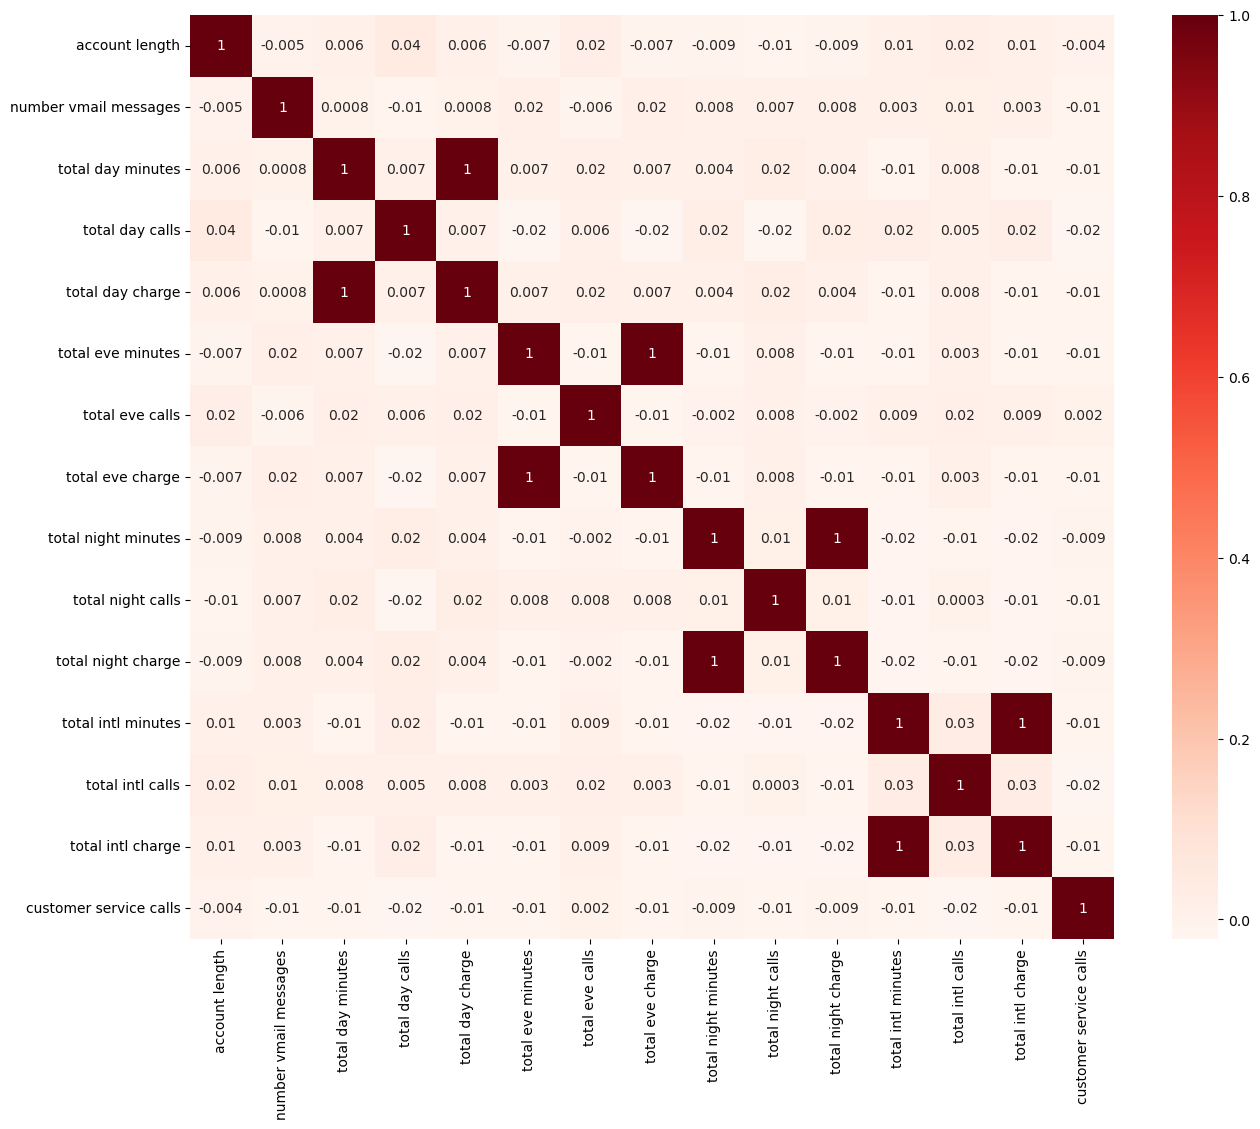

In [78]:
corr_matrix = df[numeric_cols].corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

* While most of the features show no correlation, there are some that exhibit a perfect positive correlation.
    - The features total night charge and total night minutes are perfectly positively correlated.
    - The features total int charge and total int minutes are perfectly positively correlated.
    - The features total day charge and total day minutes are perfectly positively correlated.
    - The features total eve charge and total eve minutes are perfectly positively correlated.
* The reason behind these features having a perfect correlation is that the charge is directly dependent on the minutes used.
* The perfect correlation coefficient of 1 indicates the presence of perfect multicollinearity, which affects linear models more significantly than nonlinear models.


### Outlier detection and treatment


In [20]:
data = df.select_dtypes(include=[np.number]).values

z_scores = stats.zscore(data)
outliers = np.where(np.abs(z_scores) > 3)

print("Shape before filtering:", df.shape)

df_filtered = df.drop(df.index[outliers[0]])
print("Shape after filtering:", df_filtered.shape)

Shape before filtering: (3333, 20)
Shape after filtering: (3169, 20)


Dropped outliers by first checking for the values which are past 3 standard deviations

### Solving for multicollinearity


In [22]:
# Find columns with correlation above 0.9
high_corr_columns = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.9:
            colname = corr_matrix.columns[i]
            high_corr_columns.add(colname)

# Print shape of columns before reducing
print("Shape before reducing columns:", df_filtered.shape)

# Remove high correlation columns from the dataframe
df_reduced = df_filtered.drop(columns=high_corr_columns)

# Print shape of columns after reducing
print("Shape after reducing columns:", df_reduced.shape)

Shape before reducing columns: (3169, 20)
Shape after reducing columns: (3169, 16)


Dropped the columns with (high) colleration of above 0.9 which were four columns

### Changing Churn values from bool- True & False to Numeric - 0 & 1


In [23]:
df_reduced['churn'].value_counts()

False    2727
True      442
Name: churn, dtype: int64

In [24]:
df_reduced["churn"] = df_reduced["churn"].map({True: 1, False: 0}).astype('int')
df_reduced['churn'].value_counts()

0    2727
1     442
Name: churn, dtype: int64

In [25]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3169 non-null   object 
 1   account length          3169 non-null   int64  
 2   area code               3169 non-null   int64  
 3   international plan      3169 non-null   object 
 4   voice mail plan         3169 non-null   object 
 5   number vmail messages   3169 non-null   int64  
 6   total day minutes       3169 non-null   float64
 7   total day calls         3169 non-null   int64  
 8   total eve minutes       3169 non-null   float64
 9   total eve calls         3169 non-null   int64  
 10  total night minutes     3169 non-null   float64
 11  total night calls       3169 non-null   int64  
 12  total intl minutes      3169 non-null   float64
 13  total intl calls        3169 non-null   int64  
 14  customer service calls  3169 non-null   

### One-hot Encoding of the categorical columns


In [32]:
# Perform one-hot encoding
ohe_state = pd.get_dummies(df_reduced['state'], dtype='int64')
ohe_area_code = pd.get_dummies(df_reduced['area code'], dtype='int64', prefix="area_code_is")
ohe_intl_plan = pd.get_dummies(df_reduced['international plan'], dtype='int64', prefix="international_plan_is", drop_first = True)
ohe_voiceml_plan = pd.get_dummies(df_reduced['voice mail plan'], dtype='int64', prefix="voice_ml_plan_is", drop_first = True)

In [33]:
df_reduced = pd.concat([df_reduced, ohe_state, ohe_area_code, ohe_intl_plan, ohe_voiceml_plan], axis=1)
df_reduced = df_reduced.drop(['state', 'area code', 'international plan', 'voice mail plan'], axis=1)
df_reduced.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,VT,WA,WI,WV,WY,area_code_is_408,area_code_is_415,area_code_is_510,international_plan_is_yes,voice_ml_plan_is_yes
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,...,0,0,0,0,0,1,0,0,1,0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,...,0,0,0,0,0,0,1,0,1,0


### Scaling

* Scaling refers to the process of transforming numerical data into a standardized range to ensure that all features are on a comparable scale, regardless of their original units or magnitude, thus preventing certain features from dominating the learning process due to their larger values. 
* MinMax scaler is often used as it linearly transforms the data to a specified range, typically between 0 and 1, preserving the original distribution while allowing for meaningful comparisons between features and preventing the impact of outliers.

In [34]:
# Create an instance of the scaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df_reduced)

# Display the scaled data with column names
scaled_data_df = pd.DataFrame(scaled_data, columns=df_reduced.columns)
scaled_data_df.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,VT,WA,WI,WV,WY,area_code_is_408,area_code_is_415,area_code_is_510,international_plan_is_yes,voice_ml_plan_is_yes
0,0.587963,0.510204,0.773921,0.576271,0.490079,0.487179,0.643519,0.422414,0.487805,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.490741,0.530612,0.450281,0.686441,0.483796,0.521368,0.675595,0.525862,0.713415,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.629630,0.000000,0.706066,0.610169,0.238095,0.581197,0.372024,0.534483,0.621951,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.384259,0.000000,0.881176,0.245763,0.041997,0.393162,0.485450,0.405172,0.280488,0.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.342593,0.000000,0.466229,0.601695,0.327712,0.683761,0.452381,0.681034,0.493902,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Train Test Split

Data is typically split into train and test sets to evaluate the performance of a machine learning model accurately, as the train set is used to train the model while the test set serves as an independent dataset to assess how well the model generalizes to unseen data.

In [35]:
X=scaled_data_df.drop(['churn'],axis=1)
y=scaled_data_df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

#### SMOTE (Synthetic Minority Over-sampling Technique)

* As noted during EDA our dataset has some class imbalance therefore we use SMOTE. 
* SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling technique commonly used in machine learning to address class imbalance. It generates synthetic examples of the minority class by interpolating between existing minority class instances, helping to create a more balanced training set and improving the model's ability to learn from the minority class. This can lead to better performance in predictive models, especially when the minority class is underrepresented and needs to be adequately captured during training.

In [38]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Model 1- Baseline: Logistic regression

In [41]:
logreg= LogisticRegression()
logreg.fit(X_train_resampled,y_train_resampled) 

LogisticRegression()

In [42]:
y_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_recall = recall_score(y_test, y_pred)
logreg_precision = precision_score(y_test, y_pred)
logreg_f1 = f1_score(y_test, y_pred)

print("**************** LOGISTIC REGRESSION MODEL RESULTS **************** ")
print(f"""
Accuracy Baseline: {logreg_accuracy:1.3f}
Recall Baseline: {logreg_recall:1.3f}
Precision Baseline: {logreg_precision:1.3f}
F1 Score Baseline: {logreg_f1:1.3f}
""")
      


**************** LOGISTIC REGRESSION MODEL RESULTS **************** 

Accuracy Baseline: 0.760
Recall Baseline: 0.729
Precision Baseline: 0.378
F1 Score Baseline: 0.497



* The accuracy baseline, which is 0.760, indicates that the model is able to predict the correct outcome in about 76% of the cases, on average.

* The recall baseline, with a value of 0.729, suggests that the model is able to capture around 73% of the actual positive cases.

* The precision baseline, at 0.378, implies that the model's positive predictions are accurate only about 38% of the time.

* The F1 score baseline is 0.497. The F1 score indicates that the model has an average level of precision and recall when predicting positive cases.

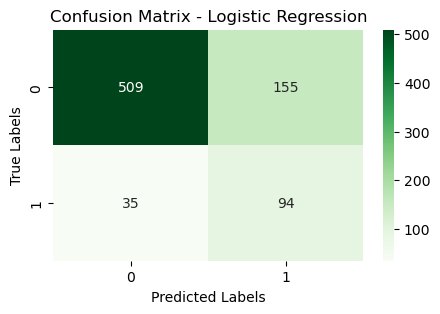

In [81]:
cm_lr = confusion_matrix(y_test, y_pred)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_lr, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

### Model 2- Random Forest

In [45]:
rf = RandomForestClassifier() 
rf.fit(X_train_resampled,y_train_resampled) 
y_pred_rf = rf.predict(X_test)

In [51]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("**************** RANDOM FOREST MODEL RESULTS **************** ")
print(f"""
Accuracy Random Forest: {rf_accuracy:1.3f}
Recall Random Forest: {rf_recall:1.3f}
Precision Random Forest: {rf_precision:1.3f}
F1 Score Random Forest: {rf_f1:1.3f}
""")

**************** RANDOM FOREST MODEL RESULTS **************** 

Accuracy Random Forest: 0.917
Recall Random Forest: 0.698
Precision Random Forest: 0.769
F1 Score Random Forest: 0.732



* This random forest model performs better than the initial logistic regression model

* The accuracy baseline, which is 0.917, indicates that the model is able to predict the correct outcome in about 91.7% of the cases, on average.

* The recall baseline, with a value of 0.698, suggests that the model is able to capture around 68.9% of the actual positive cases.

* The precision baseline, at 0.769, implies that the model's positive predictions are accurate only about 76.9% of the time.

* The F1 score baseline is 0.732 indicating that the model achieves a relatively good balance between precision and recall when predicting positive cases. This suggests that the model's positive predictions are accurate, and it can effectively capture a significant portion of the actual positive cases.

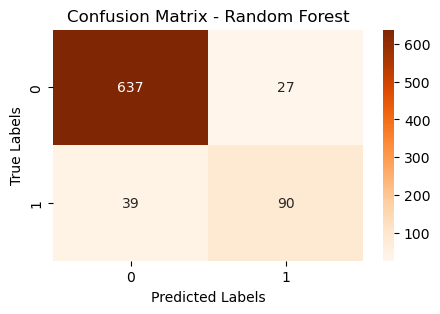

In [83]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

### Hyperparameter tuning the Random Forest Model

In [48]:
param_grid = {"max_depth": [10,15,20],
             "n_estimators":[300,500],
             "min_samples_split":[5,10,15],
             "criterion":['entropy','gini']}

In [50]:
rf_cv = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_cv,param_grid,cv=3,n_jobs=-1,verbose=False)
rf_cv_model.fit(X_train_resampled,y_train_resampled)
print("Best parameters for the random forest model")
rf_cv_model.best_params_

Best parameters for random forest model


{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 5,
 'n_estimators': 500}

In [52]:
rf_final = RandomForestClassifier(criterion='entropy',
                                max_depth=20,
                                min_samples_split=5,
                                n_estimators=500)
rf_final.fit(X_train_resampled,y_train_resampled)
y_pred_final = rf_final.predict(X_test)

In [53]:
rf_final_accuracy = accuracy_score(y_test, y_pred_final)
rf_final_recall = recall_score(y_test, y_pred_final)
rf_final_precision = precision_score(y_test, y_pred_final)
rf_final_f1 = f1_score(y_test, y_pred_final)

print("**************** HYPERPARAMETER TUNED RANDOM FOREST MODEL RESULTS **************** ")
print(f"""
Accuracy Tuned Random Forest: {rf_final_accuracy:1.3f}
Recall Tuned Random Forest: {rf_final_recall:1.3f}
Precision Tuned Random Forest: {rf_final_precision:1.3f}
F1 Score Tuned Random Forest: {rf_final_f1:1.3f}
""")

**************** HYPERPARAMETER TUNED RANDOM FOREST MODEL RESULTS **************** 

Accuracy Tuned Random Forest: 0.922
Recall Tuned Random Forest: 0.736
Precision Tuned Random Forest: 0.772
F1 Score Tuned Random Forest: 0.754



* This random forest model performs slightly better than the previous random forest model

* The accuracy baseline, which is 0.922, indicates that the model is able to predict the correct outcome in about 92.2% of the cases, on average.

* The recall baseline, with a value of 0.736, suggests that the model is able to capture around 73.6% of the actual positive cases.

* The precision baseline, at 0.772, implies that the model's positive predictions are accurate only about 77.2% of the time.

* The F1 score baseline is 0.754 indicating that the model achieves a relatively good balance between precision and recall when predicting positive cases. This suggests that the model's positive predictions are accurate, and it can effectively capture a significant portion of the actual positive cases.

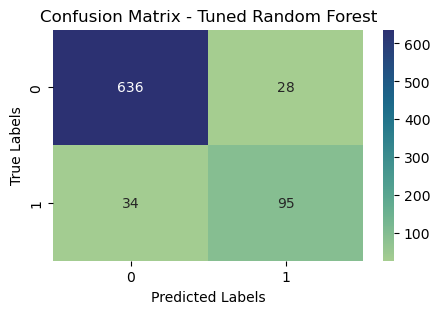

In [82]:
cm_rf_final = confusion_matrix(y_test, y_pred_final)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf_final, annot=True, cmap='crest', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix - Tuned Random Forest')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

### ROC comparisons

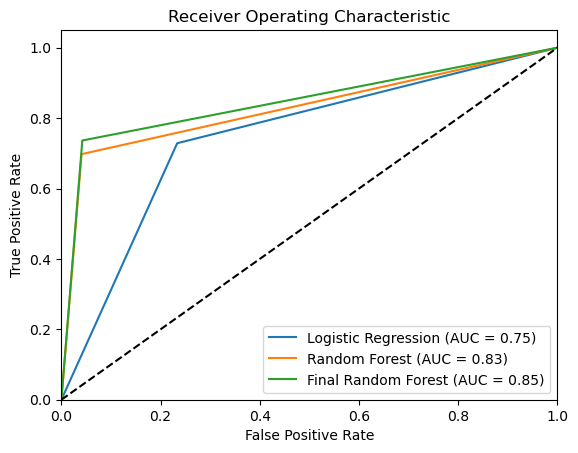

In [65]:
# Compute ROC curve and AUC for each model
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, y_pred)
logreg_auc = auc(logreg_fpr, logreg_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf)
rf_auc = auc(rf_fpr, rf_tpr)

rf_final_fpr, rf_final_tpr, _ = roc_curve(y_test, y_pred_final)
rf_final_auc = auc(rf_final_fpr, rf_final_tpr)

# Plot ROC curves
plt.figure()
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = %0.2f)' % logreg_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(rf_final_fpr, rf_final_tpr, label='Final Random Forest (AUC = %0.2f)' % rf_final_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

* The AUC (Area Under the Curve) result of 0.75 for the logistic regression model suggests that it performs moderately well in distinguishing between positive and negative cases. 
* The random forest regression model, with an AUC of 0.83, demonstrates better discriminatory ability than the logistic regression model. 
* Finally, the random forest model with a higher AUC of 0.85 indicates the strongest discriminatory power among the three models, making it more effective in classifying true and false cases.

### Feature Importance

* Checking for feature importance is important because it helps identify the most influential variables in predicting the target outcome, allowing us to understand which features have the most significant impact on the model's performance. 
* This information can be valuable for prioritizing resources for further investigation, and gaining insights into the underlying relationships within the dataset.

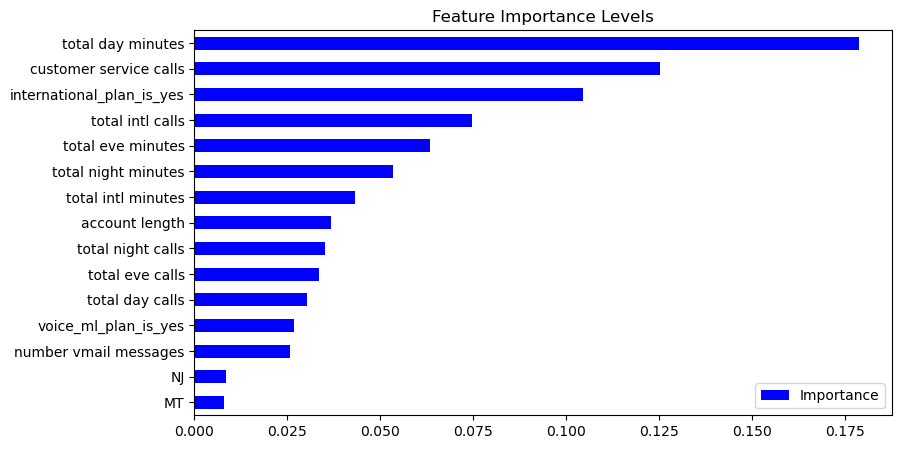

In [84]:
# Get the feature importances
feature_importances = rf_final.feature_importances_

# Create a DataFrame of the feature importances
importance_df = pd.DataFrame({"Importance": feature_importances}, index=X_train_resampled.columns)

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by="Importance", ascending=True)

# Get the top 15 features
top_15_features = importance_df.tail(15)

# Plot the bar chart
top_15_features.plot(kind="barh", color="b", figsize=(9, 5))

# Add a title
plt.title("Feature Importance Levels")

# Show the plot
plt.show()

The chart above shows the 15 top most important features

### Conclusion